<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/3_LinearRegressionProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1

Identify how this problem is different from previous problem of classification(hint check data type of target) and how it is similar

Import Library for Data Manipulation

Import Libraries for data visualization




# Import Libraries

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load and Validate Data

In [227]:
df=pd.read_csv('Salary_Data_YOE.csv')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [229]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# Exploratory Data Analysis

In [230]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: xlabel='Salary', ylabel='Count'>

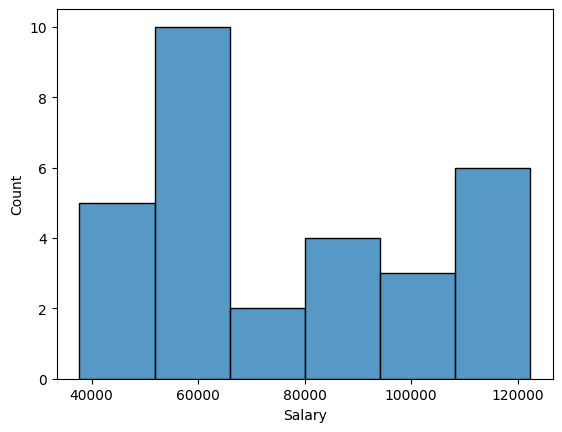

In [231]:
#Salary Distribution
sns.histplot(x='Salary',data=df)
#positively skewed data

<Axes: xlabel='YearsExperience', ylabel='Salary'>

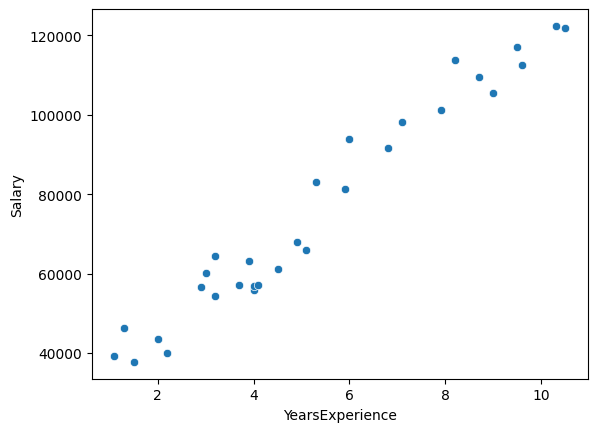

In [235]:
#year of experience with sal

sns.scatterplot(x='YearsExperience',y='Salary',data=df)

# ML Modelling

## Data Preparation for ML Modelling

## Target and Features

In [236]:
X=df.drop(columns=['Salary'])
y=df['Salary']
X.head()


,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


## Train Test Split

In [237]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Train the Model

In [238]:

lr_model=LinearRegression()


In [239]:
lr_model.fit(X_train,y_train)

LinearRegression()

## Predict

In [241]:
y_pred=lr_model.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [242]:
# y_test[0:4]
y_test

27    112635
15     67938
23    113812
17     83088
8      64445
9      57189
Name: Salary, dtype: int64

# Performance Evaluation

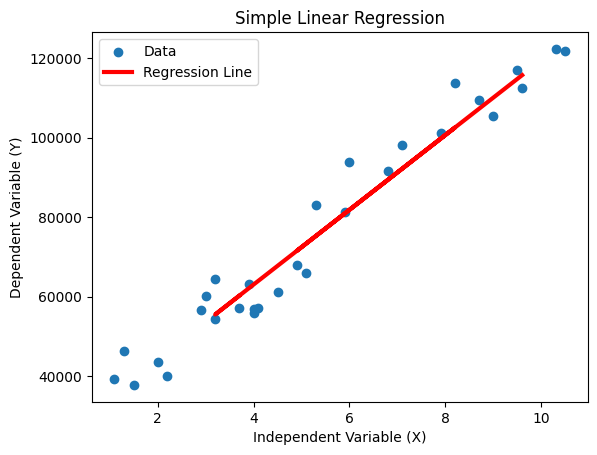

In [243]:
# Plot the dataset and regression line
plt.scatter(X, y, label='Data')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [244]:
df_res=pd.DataFrame({"Actual Value": y_test,"Predicted Value":y_pred,"Error":y_test-y_pred,"Abs Error":np.abs(y_test-y_pred),"Sq Error":np.square(y_test-y_pred)})

In [245]:
df_res

,Actual Value,Predicted Value,Error,Abs Error,Sq Error
27,112635,115790.210113,-3155.210113,3155.210113,9.955351e+06
15,67938,71498.278095,-3560.278095,3560.278095,1.267558e+07
23,113812,102596.868661,11215.131339,11215.131339,1.257792e+08
17,83088,75267.804224,7820.195776,7820.195776,6.115546e+07
8,64445,55477.792045,8967.207955,8967.207955,8.041082e+07
9,57189,60189.699707,-3000.699707,3000.699707,9.004199e+06


In [246]:
# sum_diff=df_res['Diff'].sum()
# print(df_res['Diff'].sum())

sum_abserror=df_res['Abs Error'].sum()
print("absolute Difference:",sum_abserror)
sum_sqerror=df_res['Sq Error'].sum()
print("squared Difference:",sum_sqerror)



absolute Difference: 37718.72298454649
squared Difference: 298980581.1354503


In [247]:
# deriving metrics

#mean of absolute difference
MAE=sum_abserror/len(df)
print("Mean Absolute Error:",MAE)

# mean of squared difference
MSE=sum_sqerror/len(df)
print("Mean Squared Error:",MSE)



Mean Absolute Error: 1257.2907661515496
Mean Squared Error: 9966019.371181676


In [248]:
# root of MSE
rmse=np.sqrt(MSE)
rmse

3156.9002789416195